<a href="https://colab.research.google.com/github/Gurpremm/Platinum-Price-Predictor/blob/master/Platinum_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [0]:
import quandl

In [0]:
df=quandl.get("JOHNMATT/PLAT", start_date="2015-03-29")

In [0]:
df = pd.DataFrame(data=df)

In [0]:
df.head()

,Hong Kong 8:30,Hong Kong 14:00,London 09:00,New York 9:30
Date,,,,
2015-03-30,1143.0,1136.0,1134.0,1126.0
2015-03-31,1125.0,1125.0,1126.0,NaN
2015-04-01,1144.0,1145.0,1147.0,1150.0
2015-04-02,1165.0,1166.0,1166.0,1158.0
2015-04-06,NaN,NaN,NaN,1184.0


In [0]:
df.keys()

Index(['Hong Kong 8:30', 'Hong Kong 14:00', 'London 09:00', 'New York 9:30'], dtype='object')

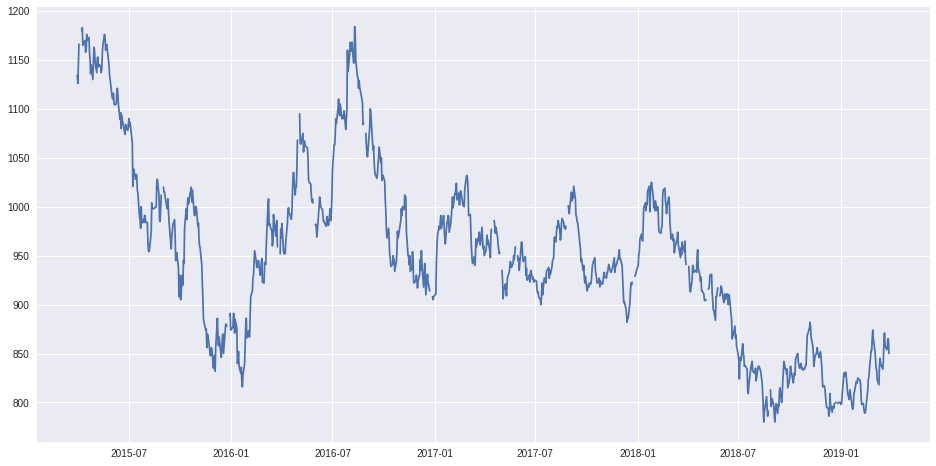

In [0]:
plt.figure(figsize=(16,8))
plt.plot(df['London 09:00'], label='Price history')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


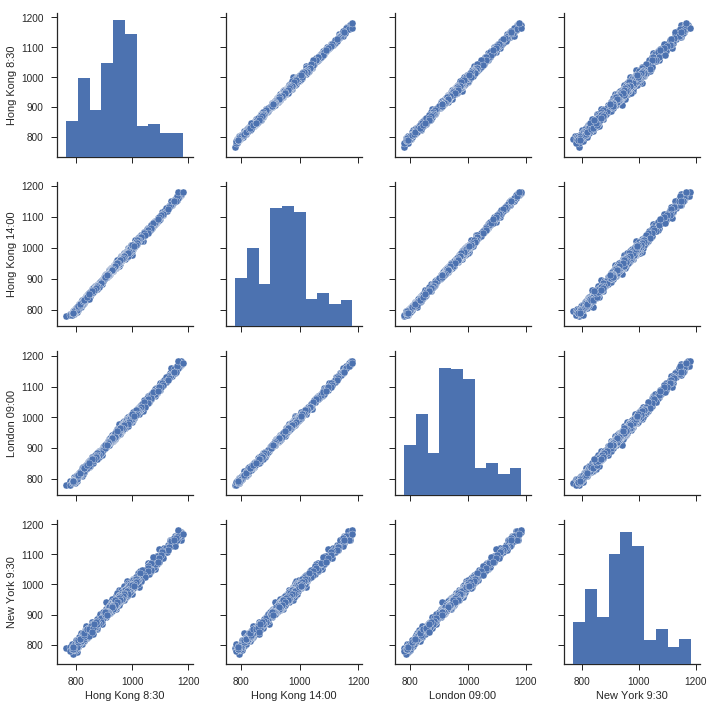

In [172]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df)

In [0]:
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'London 09:00'])

for i in range(0,len(data)):
    new_data['Date'][i] = df.index[i]
    new_data['London 09:00'][i] = df['London 09:00'][i]
    
new_data.index = new_data['Date']


In [139]:
#setting index as date values

data['Date']=df.index
data.head()

,Hong Kong 8:30,Hong Kong 14:00,London 09:00,New York 9:30,Date
Date,,,,,
2015-03-30,1143.0,1136.0,1134.0,1126.0,2015-03-30
2015-03-31,1125.0,1125.0,1126.0,NaN,2015-03-31
2015-04-01,1144.0,1145.0,1147.0,1150.0,2015-04-01
2015-04-02,1165.0,1166.0,1166.0,1158.0,2015-04-02
2015-04-06,NaN,NaN,NaN,1184.0,2015-04-06


In [141]:
new_data.head()

,Date,London 09:00
Date,,
2015-03-30,2015-03-30 00:00:00,1134
2015-03-31,2015-03-31 00:00:00,1126
2015-04-01,2015-04-01 00:00:00,1147
2015-04-02,2015-04-02 00:00:00,1166
2015-04-06,2015-04-06 00:00:00,NaN


In [142]:
new_data.describe()

,Date,London 09:00
count,1031,1013.0
unique,1031,324.0
top,2015-10-23 00:00:00,1000.0
freq,1,16.0


In [143]:
new_data.isnull().sum()


Date             0
London 09:00    18
dtype: int64

In [0]:
mean_value=new_data['London 09:00'].mean()
new_data['London 09:00']=new_data['London 09:00'].fillna(mean_value)

In [145]:
new_data.head()

,Date,London 09:00
Date,,
2015-03-30,2015-03-30 00:00:00,1134.000000
2015-03-31,2015-03-31 00:00:00,1126.000000
2015-04-01,2015-04-01 00:00:00,1147.000000
2015-04-02,2015-04-02 00:00:00,1166.000000
2015-04-06,2015-04-06 00:00:00,950.255676


In [146]:
new_data.isnull().sum()



Date            0
London 09:00    0
dtype: int64

In [0]:
#create features
from fastai.structured import  add_datepart


In [0]:
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [149]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [150]:
new_data.head()

,London 09:00,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
Date,,,,,,,,,,,,,,
2015-03-30,1134.000000,2015,3,14,30,0,89,False,False,False,False,False,False,1
2015-03-31,1126.000000,2015,3,14,31,1,90,True,False,True,False,False,False,0
2015-04-01,1147.000000,2015,4,14,1,2,91,False,True,False,True,False,False,0
2015-04-02,1166.000000,2015,4,14,2,3,92,False,False,False,False,False,False,0
2015-04-06,950.255676,2015,4,15,6,0,96,False,False,False,False,False,False,1


In [151]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1031 entries, 2015-03-30 to 2019-03-29
Data columns (total 14 columns):
London 09:00        1031 non-null float64
Year                1031 non-null int64
Month               1031 non-null int64
Week                1031 non-null int64
Day                 1031 non-null int64
Dayofweek           1031 non-null int64
Dayofyear           1031 non-null int64
Is_month_end        1031 non-null bool
Is_month_start      1031 non-null bool
Is_quarter_end      1031 non-null bool
Is_quarter_start    1031 non-null bool
Is_year_end         1031 non-null bool
Is_year_start       1031 non-null bool
mon_fri             1031 non-null int64
dtypes: bool(6), float64(1), int64(7)
memory usage: 118.5 KB


In [0]:
#split into train and validation
train = new_data[:722]
valid = new_data[722:]

x_train = train.drop('London 09:00', axis=1)
y_train = train['London 09:00']
x_valid = valid.drop('London 09:00', axis=1)
y_valid = valid['London 09:00']

In [153]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [154]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

108.09596657703311

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


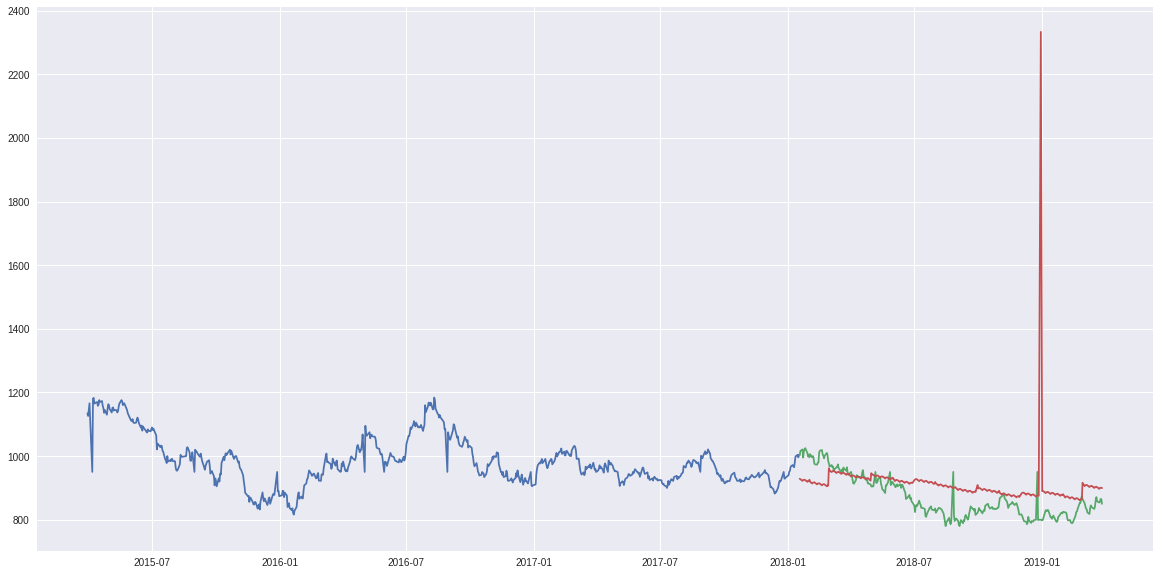

In [155]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[722:].index
train.index = new_data[:722].index

plt.plot(train['London 09:00'])
plt.plot(valid[['London 09:00', 'Predictions']])

In [0]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [157]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

170.27848481144466

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


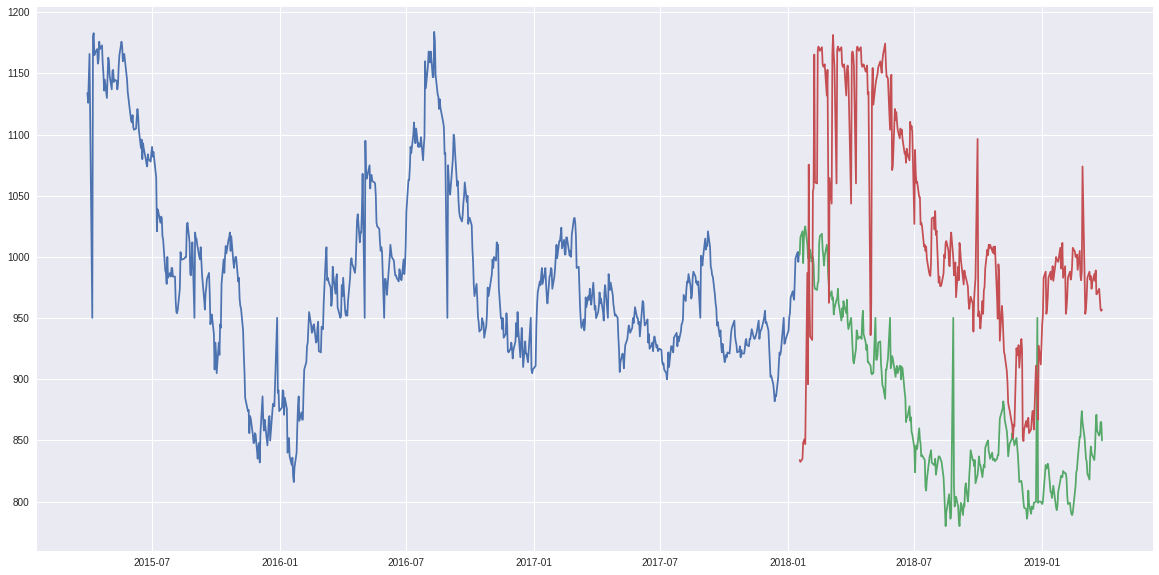

In [158]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[722:].index
train.index = new_data[:722].index

plt.plot(train['London 09:00'])
plt.plot(valid[['London 09:00', 'Predictions']])

In [0]:
new_data.index

In [0]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
ls_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'London 09:00'])
for i in range(0,len(data)):
    ls_data['Date'][i] = df.index[i]
    ls_data['London 09:00'][i] = data['London 09:00'][i]

mean_value=ls_data['London 09:00'].mean()
ls_data['London 09:00']=ls_data['London 09:00'].fillna(mean_value)
#setting index
ls_data.index = ls_data.Date
ls_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = ls_data.values

train = dataset[0:722,:]
valid = dataset[722:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))



In [160]:
x_train.shape , y_train.shape

((662, 60, 1), (662,))

In [161]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=1)




Epoch 1/1
662/662 [==============================] - 44s 67ms/step - loss: 0.0076


In [0]:
#predicting 309 values, using past 60 from the training data
inputs = ls_data[len(ls_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)



In [164]:
X_test.shape



(309, 60)

In [165]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_test.shape

(309, 60, 1)

In [166]:
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

22.125028370319313

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


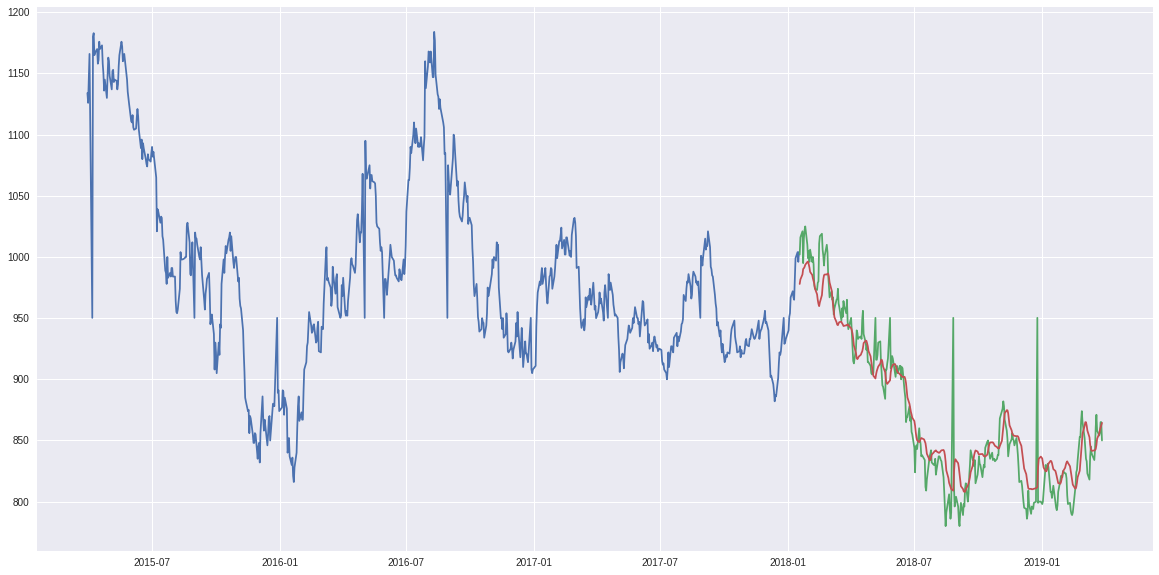

In [167]:
#for plotting
train = new_data[:722]
valid = new_data[722:]
valid['Predictions'] = closing_price
plt.plot(train['London 09:00'])
plt.plot(valid[['London 09:00','Predictions']])

In [169]:
valid

,London 09:00,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri,Predictions
Date,,,,,,,,,,,,,,,
2018-01-18,1002.0,2018,1,3,18,3,18,False,False,False,False,False,False,0,977.952026
2018-01-19,1016.0,2018,1,3,19,4,19,False,False,False,False,False,False,1,981.569580
2018-01-22,1021.0,2018,1,4,22,0,22,False,False,False,False,False,False,1,985.732178
2018-01-23,995.0,2018,1,4,23,1,23,False,False,False,False,False,False,0,990.171509
2018-01-24,1015.0,2018,1,4,24,2,24,False,False,False,False,False,False,0,990.807129
2018-01-25,1022.0,2018,1,4,25,3,25,False,False,False,False,False,False,0,991.817444
2018-01-26,1025.0,2018,1,4,26,4,26,False,False,False,False,False,False,1,993.613647
2018-01-29,1010.0,2018,1,5,29,0,29,False,False,False,False,False,False,1,995.921448
2018-01-30,999.0,2018,1,5,30,1,30,False,False,False,False,False,False,0,996.246704
